# Discussion 8: Social Impacts of Palisades & Eaton Fires

In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from janitor import clean_names
from matplotlib.lines import Line2D

In [3]:
# Load data
fp1 = os.path.join("data", "California_Historic_Fire_Perimeters_-5643920427189821347.geojson")
perimeter_data = gpd.read_file(fp1).clean_names()

fp2 = os.path.join("data", "EJI_2024_California", "EJI_2024_California.gdb")
eji_data = gpd.read_file(fp2).clean_names()

## 2. Polygon intersection

In [4]:
# Filter to 2025 Palisades
palisades_perimeter = perimeter_data[(perimeter_data['fire_name'] == "PALISADES") & (perimeter_data['year_'] == 2025)]

In [5]:
# Change EJI CRS before joining
if palisades_perimeter.crs != eji_data.crs:
    print(f"No CRS match. Matching now to {palisades_perimeter.crs} ")
    eji_data = eji_data.to_crs(palisades_perimeter.crs)
else:
    print("CRS match.")



No CRS match. Matching now to EPSG:3857 


In [6]:
palisades_census = gpd.sjoin(left_df=eji_data, right_df=palisades_perimeter, how='inner')

<Axes: >

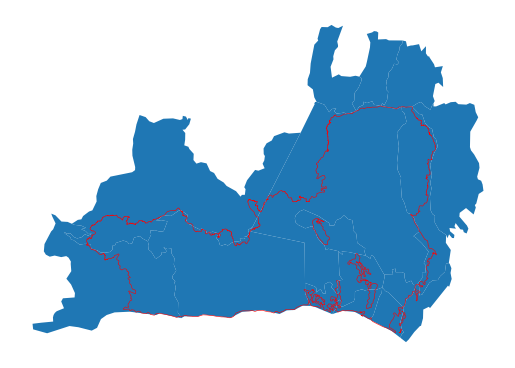

In [12]:
fig, ax = plt.subplots()

ax.axis('off')

palisades_census.plot(ax=ax)
palisades_perimeter.boundary.plot(ax=ax, edgecolor='red', linewidth=0.4)

<Axes: >

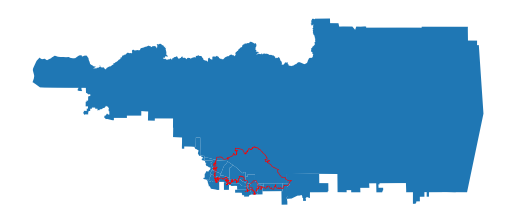

In [13]:
# Filter to 2025 Eaton
eaton_perimeter = perimeter_data[(perimeter_data['fire_name'] == "EATON") & (perimeter_data['year_'] == 2025)]

# Spatial join
eaton_census = gpd.sjoin(left_df=eji_data, right_df=eaton_perimeter, how='inner')

fig, ax = plt.subplots()

ax.axis('off')

eaton_census.plot(ax=ax)
eaton_perimeter.boundary.plot(ax=ax, edgecolor='red', linewidth=0.4)

## 3. Polygon clipping

<Axes: >

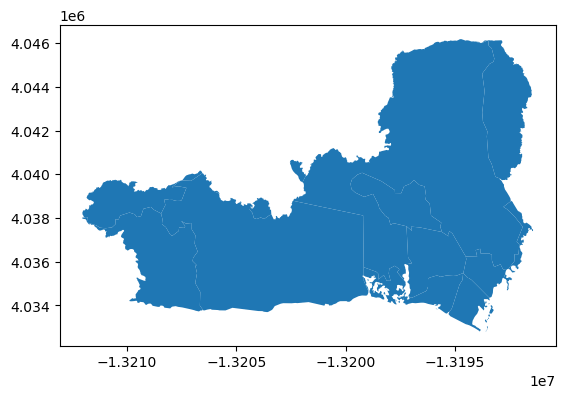

In [14]:
palisades_clip = gpd.clip(gdf=palisades_census, mask=palisades_perimeter)
palisades_clip.plot()

<Axes: >

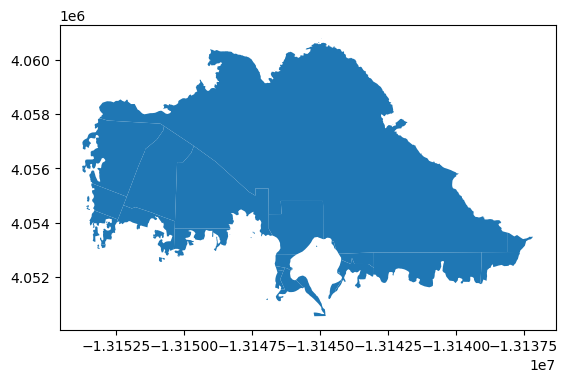

In [15]:
eaton_clip = gpd.clip(gdf=eaton_census, mask=eaton_perimeter)
eaton_clip.plot()

## 4. Visualize with basemap

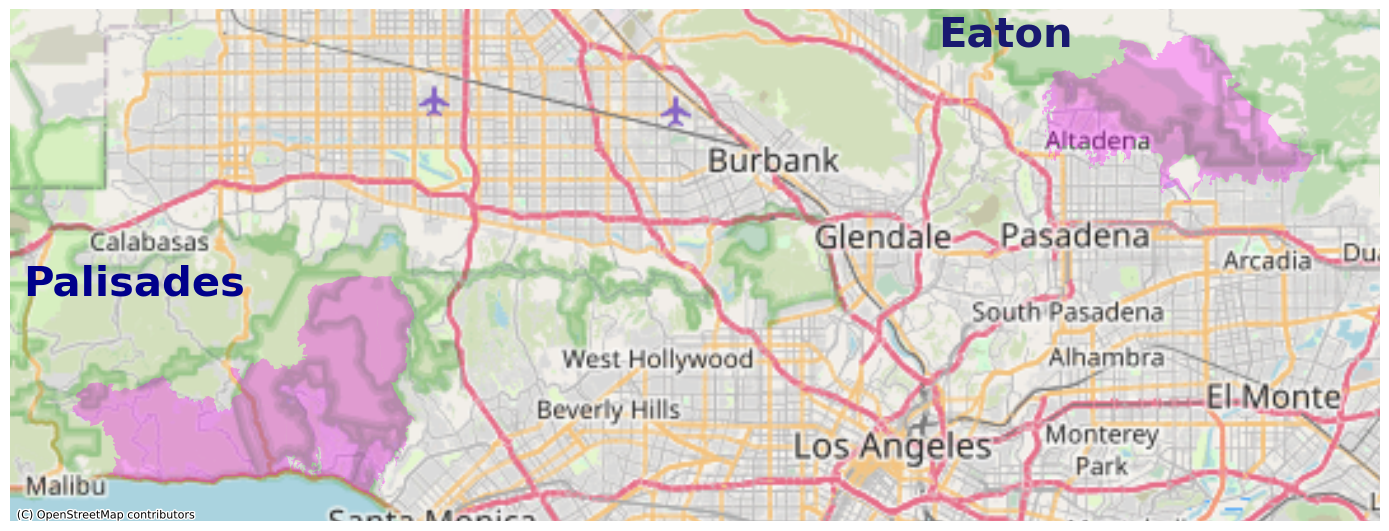

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))


# ADD FIRE PERIMETERS: UPDATE FILL TRANSPARENCY AND COLOR
palisades_clip.plot(ax=ax, facecolor='fuchsia', alpha=0.3)
eaton_clip.plot(ax=ax, facecolor='fuchsia', alpha=0.3)

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE
ax.text(x=-13215000, y=4045000, s="Palisades", fontsize=30, color='darkblue', weight='bold')
ax.text(x=-13160000, y=4060000, s="Eaton", fontsize=30, color='midnightblue', weight='bold')
# ADD TITLE

ax.axis('off')

plt.tight_layout()
plt.show()

## 5. Visualize fires with EJI data

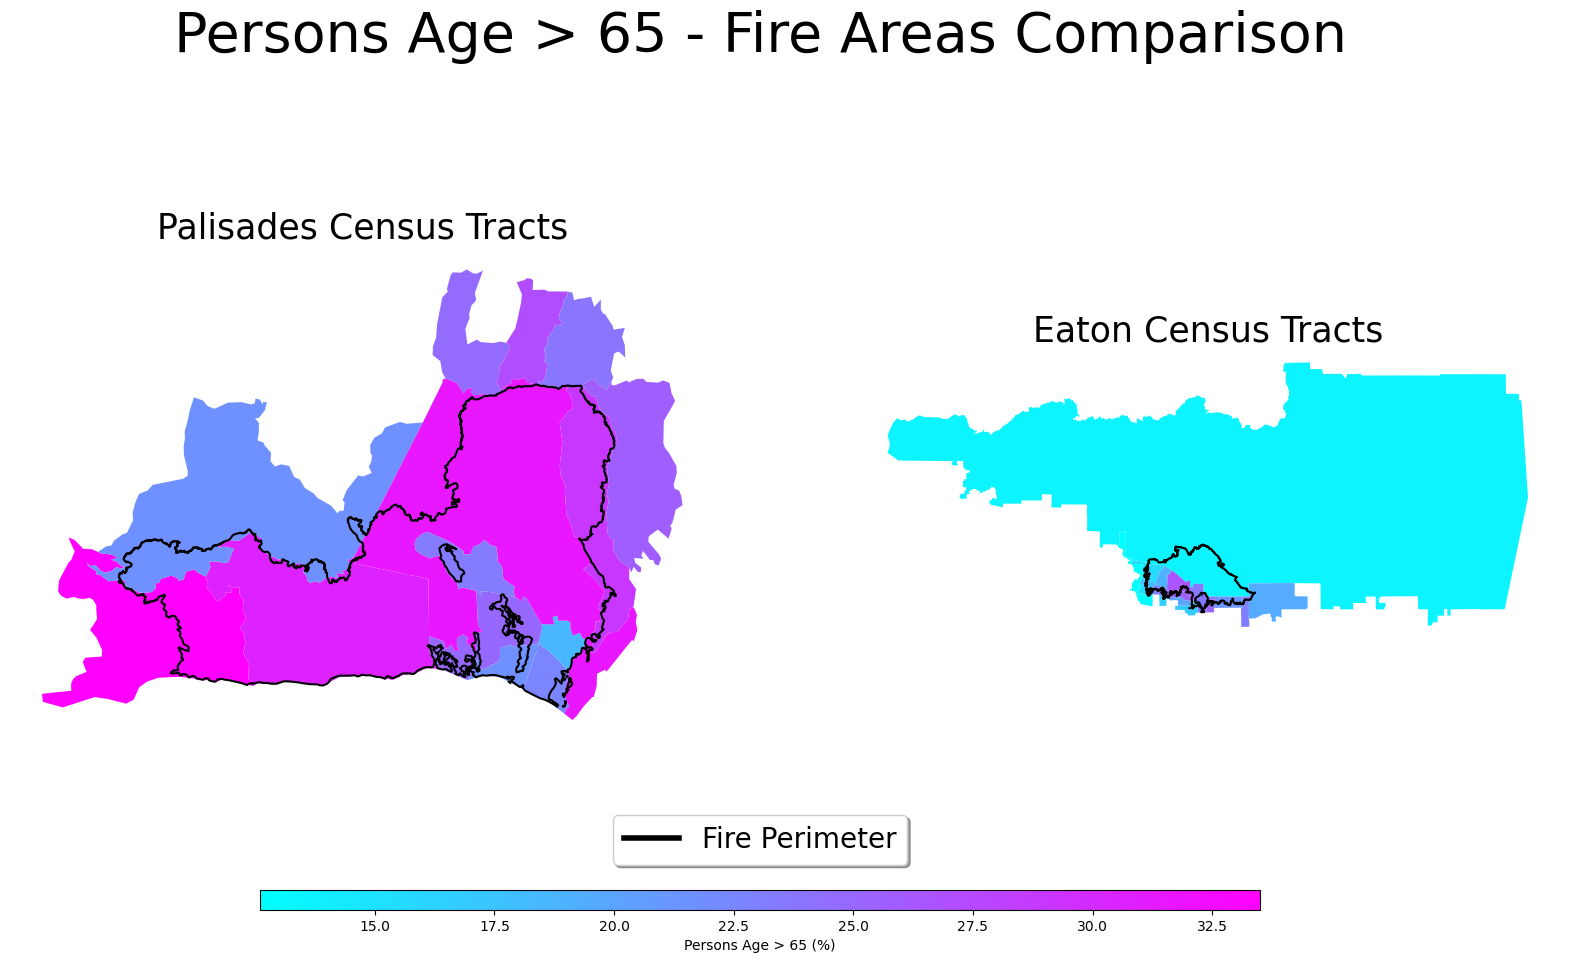

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'e_age65'

# Find common min/max for legend range
vmin = min(palisades_census[eji_variable].min(), eaton_census[eji_variable].min())
vmax = max(palisades_census[eji_variable].max(), eaton_census[eji_variable].max())

# Plot census tracts within Palisades perimeter
palisades_census.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
    cmap='cool'
)

palisades_perimeter.boundary.plot(ax=ax1, edgecolor='black')

ax1.set_title('Palisades Census Tracts', size=25)
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_census.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
    cmap='cool'
)

eaton_perimeter.boundary.plot(ax=ax2, edgecolor='black')


ax2.set_title('Eaton Census Tracts', size=25)
ax2.axis('off')

# Add overall title
fig.suptitle('Persons Age > 65 - Fire Areas Comparison', size=40)

# Custom legend
custom_line = [Line2D([0], [0], color='black', lw=4)]
fig.legend(custom_line, ['Fire Perimeter'], bbox_to_anchor=(0.5, 0.15), loc='center', fontsize=20, shadow=True)

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='cool')
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Persons Age > 65 (%)')

plt.show()